# NLP Customer Sentiment Analysis on Voice Recognition Product

Natural Language Processing can be used to build predictive models to perform sentiment analysis on social media posts and reviews and predict if customers are happy with the product or not. 

Natural Language Processors works by converting words into numbers and training a machine learning model.

That way, we can automatically know if our customers are happy or not without manually going through massive number of tweets or reviews!


# Task #1-Understand The Problem Statement and Business Case:

In this project, The Public relations department team has collected extensive data on their customers such as product reviews. Based on the reviews ( in text format), the team would like to predict whether their customers are satisfied with the product or not. 

Learn how to leverage the power of data science to deal with text data

Perform  Exploratory Data Aalysis (EDA) and learn how to create a WorldCloud visualization

Learn the basics of Natual Langiuage Processing

Apply the Natural language Toolkit or NLTK to perforn tokenization

Apply feature extraction using count vectorizer

Understand the theory behind Naive Bayes Classifiers

Learn how to work with unbalanced datasets

Train a ML Clasiifier model using scikit learn library

# Task #2: Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(42)
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

In [3]:
reviews_df = pd.read_csv('/Users/hilmi/Desktop/NLP Sentiment Analysis Project/amazon_alexa.tsv',sep='\t')

# Task #3: Exploring Dataset (EDA)

Reviews Dataset has 3150 rows and 5 features (columns). Dataset has int64(2) and  object(3) datatypes.
Memory Usage: 123.2+ KB. 

Each rows corresponds to a customer review and includes the variables below. 

Rating   : customer rating ranging from 1 to 5, 5 means customer is totally satisfied with the products

Date     :date of the customer review

Variation :variety of the product, different physical features like color 

Verified_reviews : submitted and verified cutsomer reviews.

Feedback : customer feedback '0'for negative feedback, '1' for positive feedback

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
reviews_df.tail(5)

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [8]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# We dont have any null values in reviews_df dataset

<AxesSubplot:>

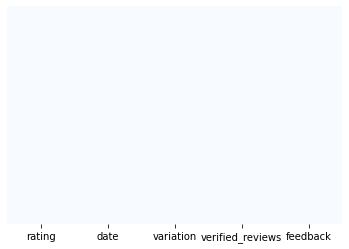

In [9]:
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues" )

In [10]:
reviews_df['lenght'] = reviews_df['verified_reviews'].apply(len)

In [11]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:ylabel='Frequency'>

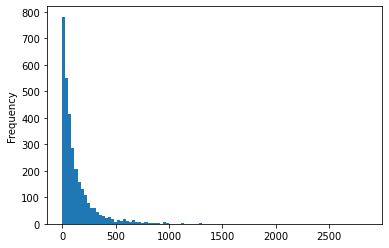

In [12]:
reviews_df['lenght'].plot(bins=100, kind = 'hist')

# Visualizations of the dataset

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>],
       [<AxesSubplot:title={'center':'lenght'}>, <AxesSubplot:>]],
      dtype=object)

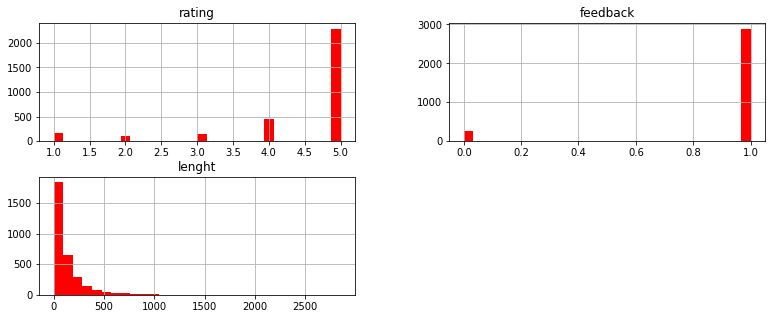

In [13]:
reviews_df.hist(bins = 30, figsize = (13, 5), color = 'r')

<AxesSubplot:xlabel='feedback', ylabel='count'>

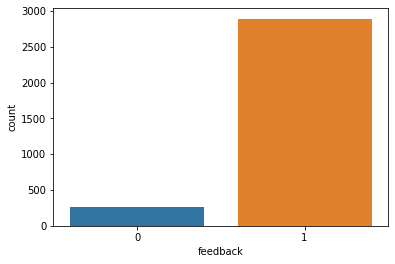

In [14]:
sns.countplot(reviews_df['feedback'], label = 'count' )

<AxesSubplot:xlabel='rating', ylabel='count'>

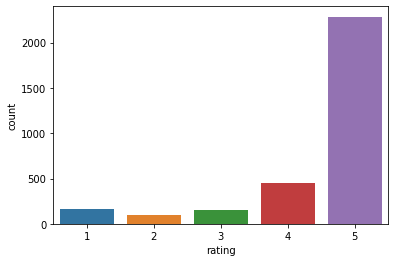

In [15]:
sns.countplot(x = 'rating', data = reviews_df)

<AxesSubplot:xlabel='variation', ylabel='rating'>

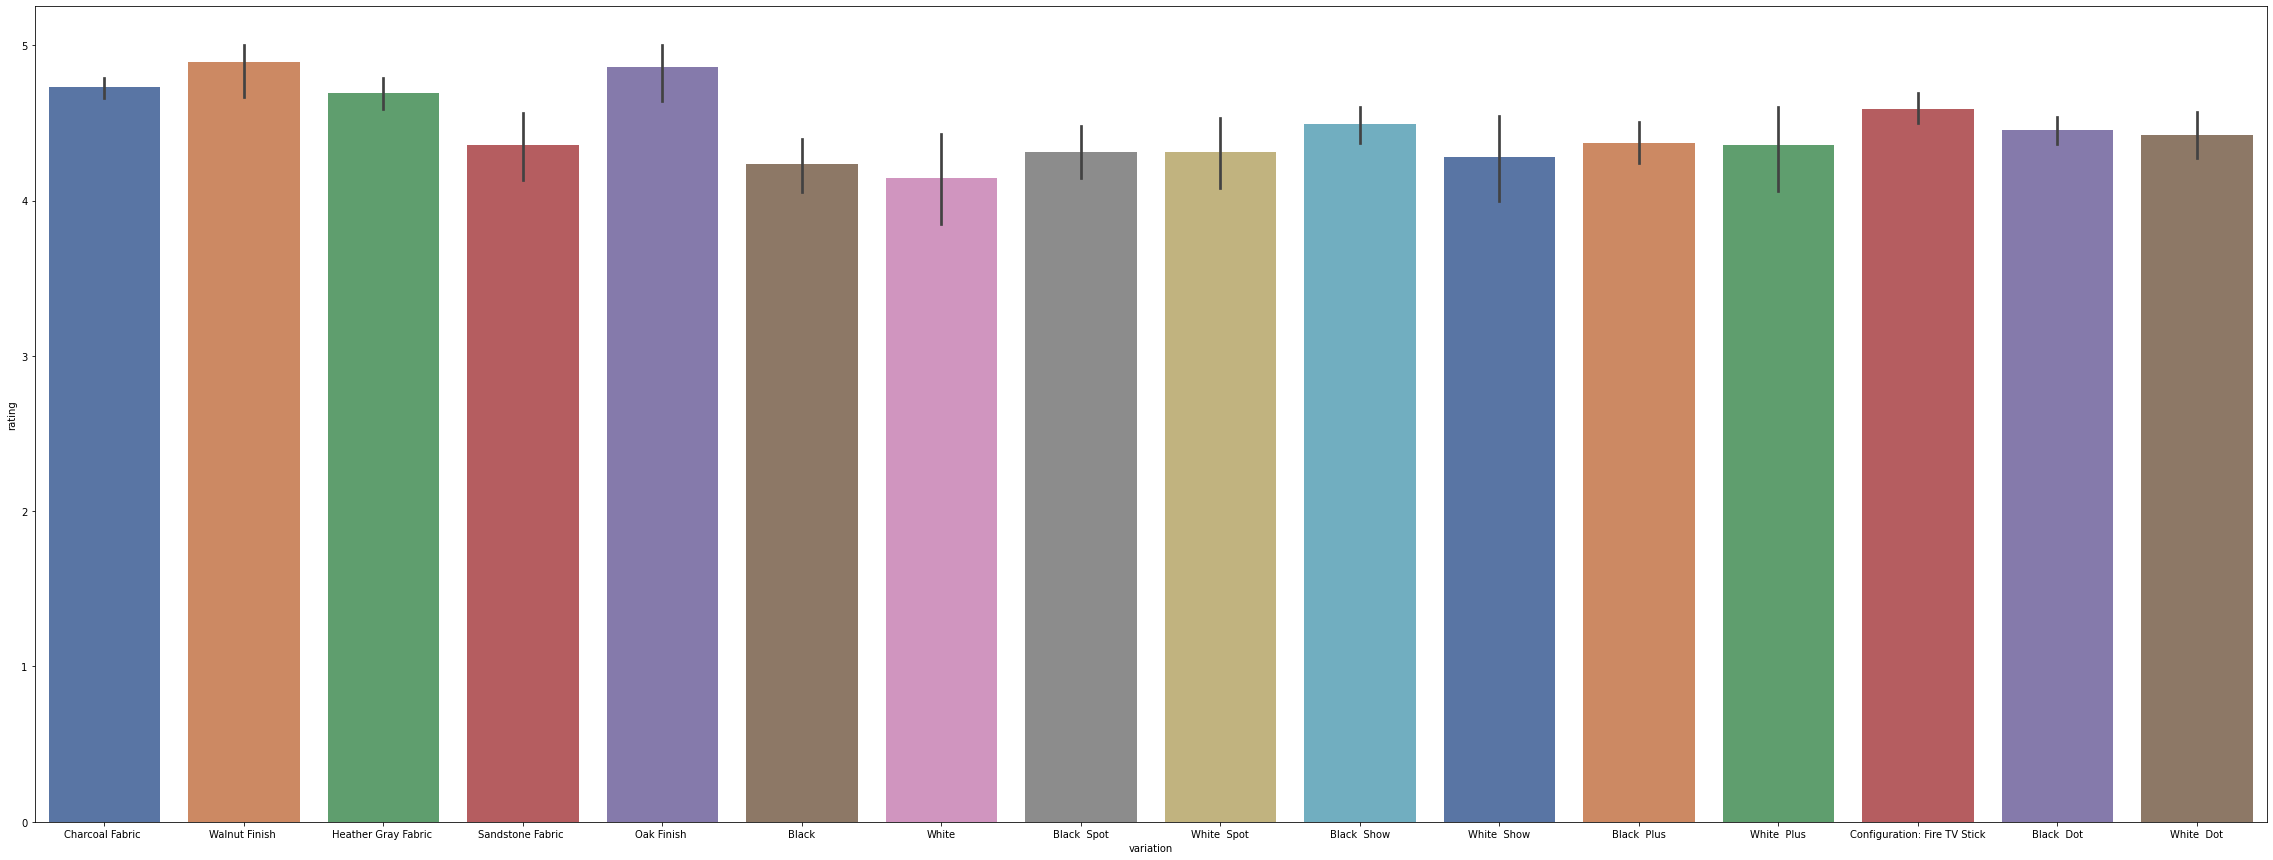

In [16]:
plt.figure(figsize=(40,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette ='deep')

In [17]:
reviews_df['lenght'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: lenght, dtype: float64

In [18]:
#Let's see the review with the max lenght
reviews_df['verified_reviews'][reviews_df['lenght']==2851].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [19]:
#Let's see the review with min lenght
reviews_df['verified_reviews'][reviews_df['lenght']==1].iloc[0]

'😍'

In [20]:
#Let's see the messsage with mean lenght
reviews_df['verified_reviews'][reviews_df['lenght']==133].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

# Positive and Negative Review Datasets

In [21]:
# Let's get the positive reviews into a new positive_df
positive_df = reviews_df[reviews_df['feedback']==1]

In [22]:
positive_df.head()

,rating,date,variation,verified_reviews,feedback,lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [23]:
# Let's get the negative reviews into a new negative_df
negative_df = reviews_df[reviews_df['feedback']==0]

In [24]:
negative_df.head()

,rating,date,variation,verified_reviews,feedback,lenght
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


# Let's build a WorldCloud and check to most frequently used positive and negative words in the reviews.  

In [25]:
# Let's get all the reviews into a sentences list
sentences = reviews_df['verified_reviews'].tolist()

In [26]:
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [27]:
len(sentences)

3150

In [28]:
#Let's join all the reviews and words in the sentences list into a one string
sentences_as_one_string =''.join(sentences)

In [29]:
sentences_as_one_string

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

# WorldCloud for all reviews

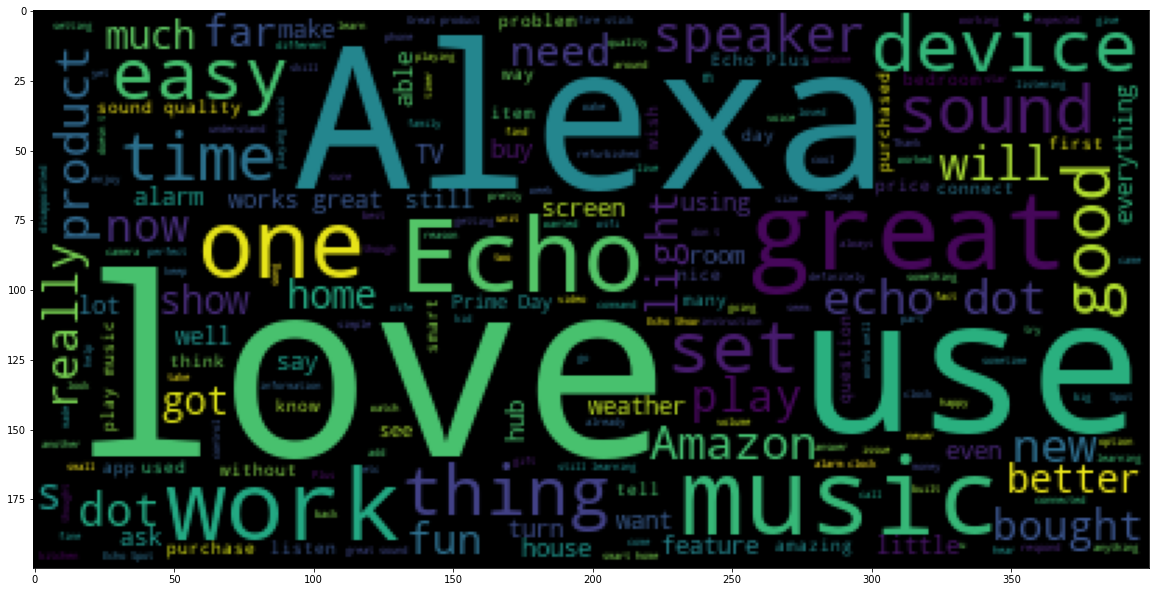

In [30]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# WorldCloud for Positive Reviews

In [31]:
#Let's get all positive reviews into a positive_sentence list
positive_sentence = positive_df['verified_reviews'].tolist()

In [32]:
#Let's get all words from positive_sentence list into one string
positive_as_one_string =''.join(positive_sentence)

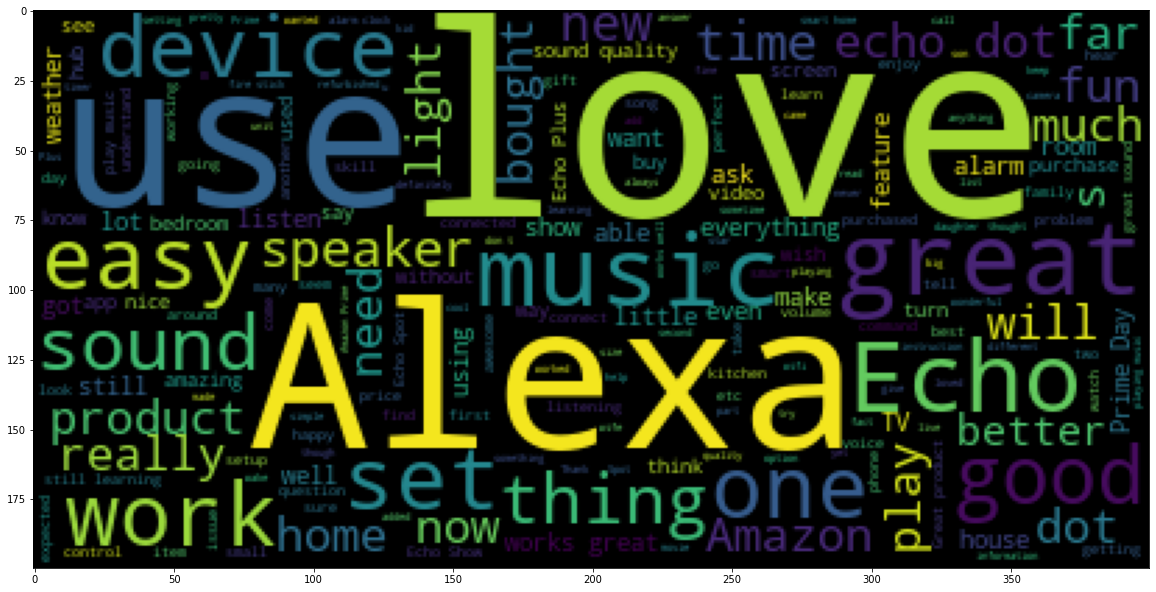

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_as_one_string))

# WorldCloud for Negative Reviews¶

In [34]:
#Let's get all negative reviews into a  negative_sentence list
negative_sentence = negative_df['verified_reviews'].tolist()

In [35]:
#Let's get all words from negative sentence list into one string
negative_as_one_string =''.join(negative_sentence)

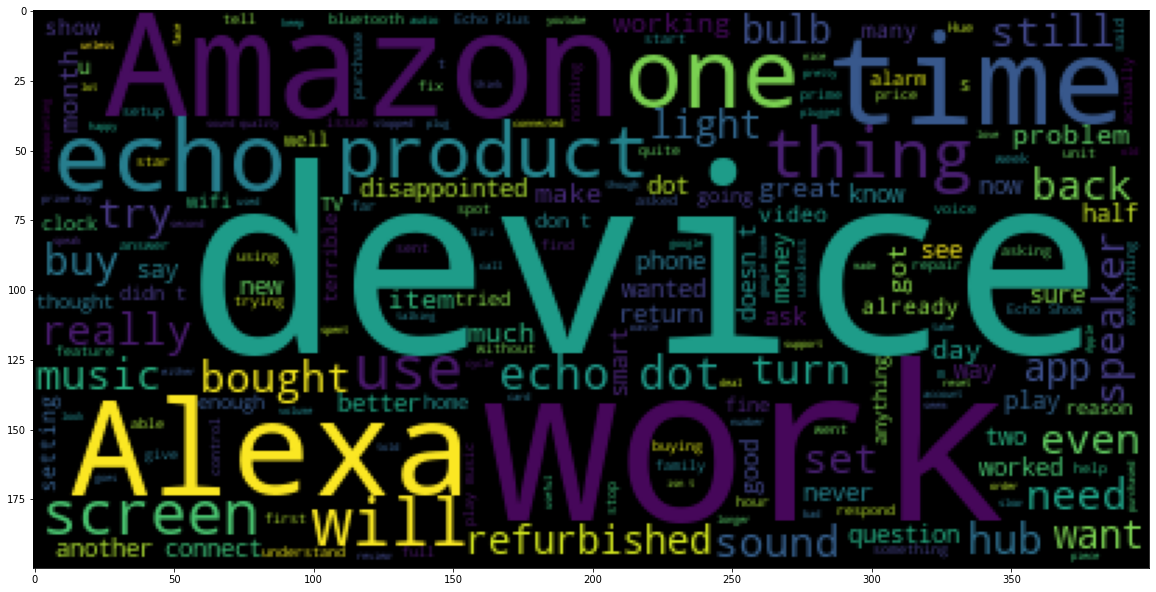

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_as_one_string))

# Task #4: Perform Data Cleaning

In [37]:
# We will not use 'date','rating' and 'lenght' of the reviews in the analysis and will drop these columns from reviews_df
reviews_df = reviews_df.drop(['date','rating','lenght'], axis = 1)

In [38]:
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


# 4.1 Dealing with Categorical Variables

In [39]:
# 'variation' variable is a categorical variable and should be converted into a numerical value.
variation_dummies =pd.get_dummies(reviews_df['variation'], drop_first = True)
#Avoid Dummy Variable trap which occurs when one variable can be predicted from the other.

In [40]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
#Let's drop the 'variation' column from reviews_df dataset.
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [42]:
reviews_df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [43]:
#Now Let's add the dummies into te reviews_df
reviews_df = pd.concat([reviews_df, variation_dummies], axis = 1)

In [44]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 4.2 Remove Punctuation from Text

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
Test = "Hello Guys, It's nice to be here with you and learning Artificial Intelligence, Machine Learning and NLP!!:))"

In [47]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]

In [48]:
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'G',
 'u',
 'y',
 's',
 ' ',
 'I',
 't',
 's',
 ' ',
 'n',
 'i',
 'c',
 'e',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'r',
 't',
 'i',
 'f',
 'i',
 'c',
 'i',
 'a',
 'l',
 ' ',
 'I',
 'n',
 't',
 'e',
 'l',
 'l',
 'i',
 'g',
 'e',
 'n',
 'c',
 'e',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'N',
 'L',
 'P']

In [49]:
#Let's join the character again to form the string
Test_punc_removed_join = ''.join(Test_punc_removed)

In [50]:
Test_punc_removed_join

'Hello Guys Its nice to be here with you and learning Artificial Intelligence Machine Learning and NLP'

# 4.3 Remove Stopword 

In [51]:
import nltk #Natural Language Tool Kit

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/hilmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
# We have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [55]:
Test_punc_removed_join_clean # Only importand and no so common words are left

['Hello',
 'Guys',
 'nice',
 'learning',
 'Artificial',
 'Intelligence',
 'Machine',
 'Learning',
 'NLP']

# 4.4  Define a Pipeline to Clean the Reviews

In [56]:
# Let's define a pipeline to clean up all the reviews 

# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def review_cleaning (review):
    review_punc_removed = [char for char in review if char not in string.punctuation]
    review_punc_removed_join = ''.join(review_punc_removed)
    review_punc_removed_clean = [word for word in review_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return review_punc_removed_clean

In [57]:
reviews_df['cleaned_reviews'] = reviews_df['verified_reviews'].apply(review_cleaning)

In [58]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,cleaned_reviews
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[Love, Echo]"
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Loved]
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[Sometimes, playing, game, answer, question, c..."
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Music]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Perfect, kids, adults, everyone]"
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Listening, music, searching, locations, check..."
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[love, things, running, entire, home, TV, ligh..."
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[complaint, sound, quality, isnt, great, mostl..."


In [59]:
print(reviews_df['cleaned_reviews'][3]) # show the cleaned up version

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [60]:
#let's check out the original review
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


# Task 7: Natural Language Processing 

# 7.1 Feature Engineering and Selection

Machine Learning models take numerical values as input. Our dataset is a list of sentences, so in order for our algorithm to extract patterns from the data, we first need to find a way to represent it in a way that our algorithm can understand, i.e. as a list of numbers.

We will implement CountVectorizer, TF-IDF, Hash Vectorizer, Word2Vec, adding most common words into the stopwords list, SMOTE, PCA, and Truncated SVD techniques into our models in the following sections as a part of feature engineering and selection.

   1. CountVectorizer
   2. TF-IDF Vectorizer
   3. Hash Vectorizer 
   4. Word2Vec

# 7.2 Implementing CountVectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = review_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [62]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [63]:
print('Vocabulary length :', len(vectorizer.get_feature_names()))

Vocabulary length : 5211


In [64]:
reviews_countvectorizer

<3150x5211 sparse matrix of type '<class 'numpy.int64'>'
	with 37628 stored elements in Compressed Sparse Row format>

In [65]:
#Let's convert numpy object into a numpy array
reviews_countvectorizer = reviews_countvectorizer.toarray() 

In [66]:
#Let's convert numpy object into pd.dataframe
reviews = pd.DataFrame(reviews_countvectorizer)

In [67]:
#Let's drop reviews_df['verified_reviews'] colum and add vectorized reviews
countVect_reviews_df = reviews_df.drop(['verified_reviews','cleaned_reviews'], axis = 1)
countVect_reviews_df = pd.concat([countVect_reviews_df, reviews], axis=1)

In [73]:
countVect_reviews_df.shape

(3150, 5227)

# 7.2.1 Separating Target Variable ( y ) and Matrix of features ( x )

In [ ]:
# Let's drop the target label coloumns
X_count_vec = countVect_reviews_df.drop(['feedback'], axis = 1)

In [ ]:
X_count_vec.shape

In [ ]:
y_count_vec = countVect_reviews_df['feedback']

In [ ]:
y_count_vec.shape

# 7.2.2 Splitting Dataset into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_count_vec, y_count_vec, test_size=0.2)

In [ ]:
print("X_train Shape\t\t:{}\ny_train Shape\t\t:{}\nX_test Shape\t\t:{}\ny_test Shape\t\t:{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# 7.2.3 Selecting the Right Evaluation Metrics

Since the data is imbalanced, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class. When the negative class is smaller and the ability to detect correctly negative samples is our main focus (correct detection of positive examples is less important to the problem) we should use precision and recall. For our particular case, based on this thought I will use f1 score which is harmonic average of precision and recall as my evaluation metric.

In [ ]:
Dummy_Classifier = DummyClassifier(strategy = 'stratified', random_state =42)
LogReg_Classifier = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42)
ExtTr_Classifier = ExtraTreesClassifier()
NBayes_Classifier = MultinomialNB()
SVM_Classifier= SVC()
RanFor_Classifier = RandomForestClassifier(n_estimators = 200, random_state = 42)
DecTr_Classifier = DecisionTreeClassifier()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.summer):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 20)
    plt.xlabel('Predicted Label', fontsize = 20)

    return plt

In [ ]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(6, 6))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False)
    plt.show()

In [ ]:
y_predicts = []

def modeling(Model):
    
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    print(str(Model))
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    # A list for all the y_preds to use later on
    global y_predicts
    y_predicts.append(y_pred)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    #Displaying Confusuion Matrix 
    disp_confusion_matrix(y_pred, model)
    
    #Printing Classification Report
    print('Classification Report\t\t:\n', classification_report(y_test, y_pred))
    
    # Printing evaluation metric (f1-score) 
    print("f1 score\t\t: {}".format(score))
    
    print(100*'*')

In [ ]:
Models =[Dummy_Classifier,
         LogReg_Classifier,
         ExtTr_Classifier,
         NBayes_Classifier,
         SVM_Classifier,
         RanFor_Classifier,
         DecTr_Classifier,
        ]

In [ ]:
for Model in Models:
    modeling(Model)   

In [ ]:
# Let's check y_preds population in the y_predicts list
len(y_predicts)

#  Comparison of Models with CountVectorizer

### Functions for Algorithms Comparison

In [ ]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

In [ ]:
# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['negative', 'positive', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [ ]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Function for f1 score plotting

In [ ]:
  def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Algorithm Comparison with CountVectorizer

In [ ]:
comparison_table(y_preds = [y_predicts[1], y_predicts[2], y_predicts[3], y_predicts[4], y_predicts[5],y_predicts[6]],
                labels = ['Logistic Reg', 'Extra Tree', 'Naive Bayes', 'SVM', 'Random Forest','Decision Tree'])

In [ ]:
df_tv2

### Average f1 scores with CountVectorizer 

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

# 7.3 Implementing TF-IDF Vectorizer

In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent and just add to the noise.

In [ ]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(analyzer = review_cleaning, ngram_range=(1, 1))
tfidf_vect_reviews = tfidf_vect.fit_transform(reviews_df['verified_reviews'])

In [ ]:
#Let's convert numpy object into a numpy array
tfidf_vect_reviews = tfidf_vect_reviews.toarray()
tfidf_vect_reviews = pd.DataFrame(tfidf_vect_reviews)

In [ ]:
tfidf_vect_reviews

In [ ]:
#Let's drop reviews_df['verified_reviews'] colum and add vectorized reviews
tfidf_vect_reviews_df = reviews_df.drop(['verified_reviews','cleaned_reviews'], axis = 1)
tfidf_vect_reviews = pd.concat([countVect_reviews_df, tfidf_vect_reviews], axis=1)

In [ ]:
tfidf_vect_reviews_df

In [ ]:
# Let's drop the target label coloumns
X_tfidf = tfidf_vect_reviews_df.drop(['feedback'], axis = 1)

In [ ]:
y_tfidf = tfidf_vect_reviews_df['feedback']

In [ ]:
#Let's split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2)

In [ ]:
for Model in Models:
    modeling(Model)

### Comparison Matrix with tf-idf Vectorizer 

In [ ]:
comparison_table(y_preds = [y_predicts[7], y_predicts[8], y_predicts[9], y_predicts[10], y_predicts[11],y_predicts[12]],
                labels = ['Logistic Reg', 'Extra Tree', 'Naive Bayes', 'SVM', 'Random Forest','Decision Tree'])

In [ ]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2

### Average f1 score with tf-idf Vectorizer

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

# 7.4 Implementing Hash Vectorizer

Hash Vectorizer is designed to be as memory efficient as possible. Instead of storing the tokens as strings, the vectorizer applies the hashing trick to encode them as numerical indexes. The downside of this method is that once vectorized, the features’ names can no longer be retrieved.

In [ ]:
# Create the word vector with Hash Vectorizer
hash_vect = HashingVectorizer(analyzer = review_cleaning, n_features=2000, ngram_range=(1,1))
hash_vect_reviews = hash_vect.fit_transform(reviews_df['verified_reviews'])

In [ ]:
#Let's convert numpy object into a numpy array
hash_vect_reviews = hash_vect_reviews.toarray()
#Let's convert numpy array into a pd.dataframe
hash_vect_reviews = pd.DataFrame(hash_vect_reviews)

In [ ]:
hash_vect_reviews

In [ ]:
hash_vect_reviews_df = reviews_df.drop(['verified_reviews','cleaned_reviews'], axis =1)
hash_vect_reviews_df = pd.concat([hash_vect_reviews_df, hash_vect_reviews], axis=1)

In [ ]:
hash_vect_reviews_df

In [ ]:
# Let's drop the target label coloumns
X_hash_vec = hash_vect_reviews_df.drop(['feedback'], axis = 1)

In [ ]:
y_hash_vec = hash_vect_reviews_df['feedback']

In [ ]:
for Model in Models:
    modeling(Model)   

### Comparison Matrix with Hash Vectorizer

In [ ]:
comparison_table(y_preds = [y_predicts[13], y_predicts[14], y_predicts[15], y_predicts[16], y_predicts[17],y_predicts[18]],
                labels = ['Logistic Reg', 'Extra Tree', 'Naive Bayes', 'SVM', 'Random Forest','Decision Tree'])

In [ ]:
# Print the comparision matrix
print('\nComparision Matrix of Models with Hash Vectorizer\n')
df_tv2

### Average f1 score with Hash Vectorizer 

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

# Choosing the best f1 Score: Random Forest with CountVectorizer has %93 f1 score and it is the best score so far.

In [ ]:
RanFor()


In [ ]:
RanFor_Classifier.fit(X_count_vec, y_count_vec) 

In [ ]:

# Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
  
    y_pred = model.predict(X_test)
    # A list for all the y_preds to use later on

    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    #Displaying Confusuion Matrix 
    disp_confusion_matrix(y_pred, model)
    
    #Printing Classification Report
    print('Classification Report\t\t:\n', classification_report(y_test, y_pred))
    
    # Printing evaluation metric (f1-score) 
    print("f1 score\t\t: {}".format(score))
    


In [ ]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# 